In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as nplin

## Defining variables from the given information

In [2]:
samples = 2000
params = 2
bins = 31

## Opening the files and storing the data

In [3]:
Data = open('jla_mub_0.txt', 'r')
z, mu = np.loadtxt(Data, unpack=True, usecols=[0,1])
print(z)
print(mu)

Covariance = np.loadtxt('jla_mub_covmatrix.txt')
Cov_matrix = np.reshape(Covariance,(bins, bins))
Cov_inverse = nplin.inv(Cov_matrix)

[0.01  0.012 0.014 0.016 0.019 0.023 0.026 0.031 0.037 0.043 0.051 0.06
 0.07  0.082 0.097 0.114 0.134 0.158 0.186 0.218 0.257 0.302 0.355 0.418
 0.491 0.578 0.679 0.799 0.94  1.105 1.3  ]
[32.95388698 33.87900347 33.84214074 34.11856704 34.59344598 34.93902653
 35.25209633 35.74850165 36.06978761 36.43457047 36.65111059 37.15801411
 37.43017325 37.95661635 38.25325404 38.61286934 39.06785071 39.3414019
 39.79214362 40.1565346  40.56495606 40.90528778 41.42141744 41.79092346
 42.23146107 42.61704707 43.05273149 43.50415083 43.97257341 44.51408758
 44.82186746]


## Defining function for Likelihood

In [4]:
def Eta(a, Omega_m):
    if Omega_m >= 0.999:
        Omega_m = 0.999
    elif Omega_m <= 0.2:
        Omega_m = 0.2
    else:
        pass
    
    s = ((1.0 - Omega_m)/Omega_m)**(1.0/3.0)
    ETA = 2.0*(np.sqrt((s**3.0) + 1.0))*(1/(a**4) - 0.1540*(s/(a**3)) + 0.4304*((s*s)/(a*a)) + 0.19097*((s**3)/a) + 0.066941*(s**4))**(-1.0/8.0)
    return ETA


def Distance_L(z, Omega_m):
    Eta_1 = Eta(1, Omega_m)
    Eta_2 = Eta(1/(1+z), Omega_m)
    
    D_L = ((3000.0)*(1+z))*(Eta_1 - Eta_2)
    return D_L


def mu_th(z,Omega_m,h):
    d_L = Distance_L(z, Omega_m)
    Mu = 25 - (5*np.log10(h)) + (5*np.log10(d_L))
    return Mu


Differ = np.empty(bins)

def Likelihood(Omega_m,h,z,mu):
    if Omega_m <= 0.0 or h <= 0.0:
        L = -1.e100
    else:
        for i in range(bins):
            Differ[i] = mu[i] - mu_th(z[i], Omega_m, h)
            
        Dot_1 = np.dot(Cov_inverse, Differ)
        L = -0.5*(np.dot(np.transpose(Differ), Dot_1))
    return L

## Sampling of parameters from the Likelihood since uniform prior is assumed

In [5]:
est_par_L = np.empty([samples, params+1])    

# Assuming the errors in the parameter are gaussian according to question
Omega_sigma = 0.01             # error/standard deviation in omega matter
h_sigma_L = 0.01                 # error/standard deviation in hubble parameter

Omega_next_L = 0                  # next value of omega matter
h_next_L = 0                      # next value of hubble parameter
L_pre_L = 0                       # previous value of ln likelihood
Accept_L = 0                      # Acceptance probability of a step
L_next_L = 0                      # next value of ln likelihood


np.random.seed(0)

est_par_L[0,0] = np.random.uniform()                            
est_par_L[0,1] = np.random.uniform()
est_par_L[0,2] = Likelihood(est_par_L[0,0],est_par_L[0,1],z,mu)    

# The values that I'll obtain from the above three variables will be the 1st samples of Omega_m and h

In [6]:
np.random.seed(0)

for i in range(1,samples):
    L_pre_L = est_par_L[i-1,2]
    Omega_next_L = np.random.normal(est_par_L[i-1,0], Omega_sigma)
    h_next_L = np.random.normal(est_par_L[i-1,1],h_sigma_L)
    L_next_L = Likelihood(Omega_next_L,h_next_L,z,mu)
    
    if L_next_L >= L_pre_L:
        est_par_L[i,0] = Omega_next_L
        est_par_L[i,1] = h_next_L
        est_par_L[i,2] = L_next_L
        Accept_L = Accept_L + 1                               # Then the step will be accepted
        print("Step is Accepted with high likelihood")
        
    else:                                          # ln(A) will give negative values since all values of A are less then 1
        A = np.random.uniform()
        if (L_next_L-L_pre_L) > np.log(A):
            est_par_L[i,0] = Omega_next_L
            est_par_L[i,1] = h_next_L
            est_par_L[i,2] = L_next_L
            Accept_L = Accept_L + 1
            print("Step is Accepted with low likelihood")
            
        else:
            est_par_L[i,0] = est_par_L[i-1,0]
            est_par_L[i,1] = est_par_L[i-1,1]
            est_par_L[i,2] = L_pre_L
            print("The step is rejected")

The step is rejected
The step is rejected
The step is rejected
Step is Accepted with high likelihood
The step is rejected
The step is rejected
The step is rejected
Step is Accepted with high likelihood
Step is Accepted with low likelihood
The step is rejected
Step is Accepted with high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is Accepted with high likelihood
The step is rejected
Step is Accepted with high likelihood
Step is Accepted with high likelihood
Step is Accepted with high likelihood
Step is Accepted with low likelihood
Step is Accepted with high likelihood
The step is rejected
Step is Accepted with low likelihood
Step is Accepted with low likelihood
The step is rejected
The step is rejected
The step is rejected
Step is Accepted with high likelihood
The step is rejected
Step is Accepted with high likelihood
The step is rejected
Step is Accepted with high likelihood
The step is rejected
Step is Accepted with high likeliho

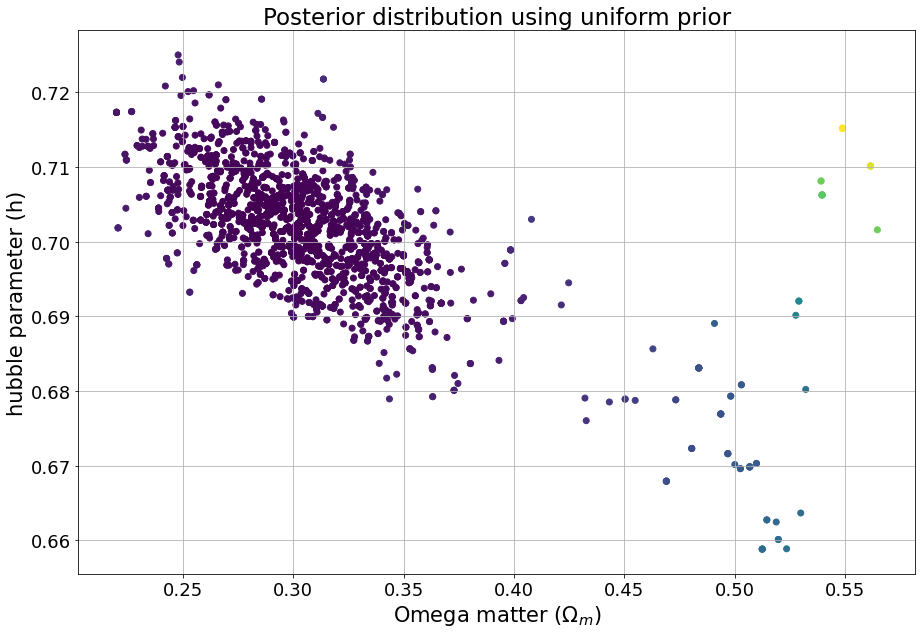

In [7]:
plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 18
plt.scatter(est_par_L[:,0], est_par_L[:,1], c = -est_par_L[:,2], marker='o')
plt.title("Posterior distribution using uniform prior", fontsize='23')
plt.xlabel("Omega matter ($\Omega_m$)", fontsize='21')
plt.ylabel("hubble parameter (h)", fontsize='21')
plt.grid(True)
plt.show()

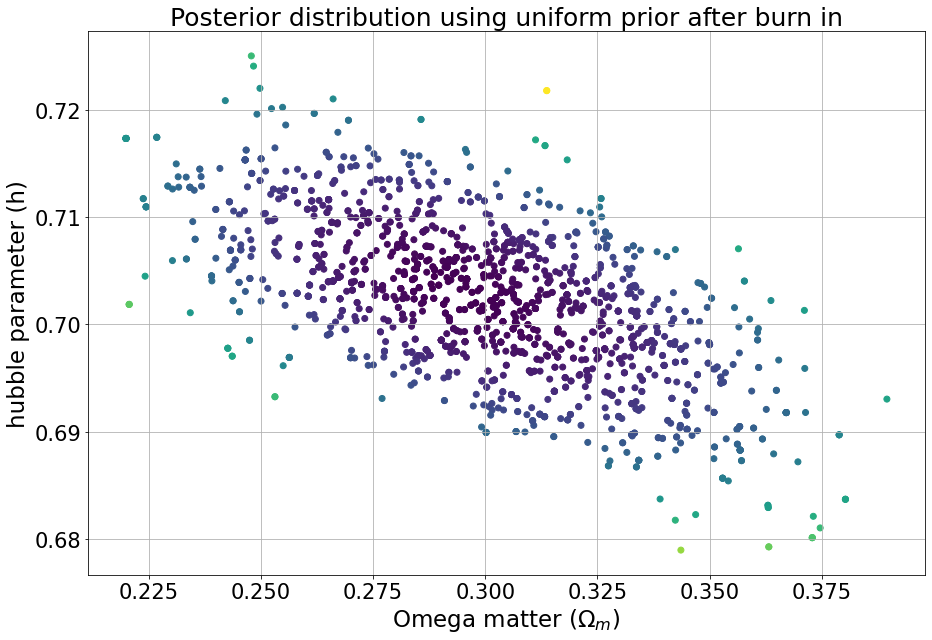

In [8]:
reject = 200       ## rejecting 10% initial sample points

plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 21
plt.scatter(est_par_L[reject:,0], est_par_L[reject:,1], c = -est_par_L[reject:,2], marker='o')
plt.title("Posterior distribution using uniform prior after burn in", fontsize='25')
plt.xlabel("Omega matter ($\Omega_m$)", fontsize='23')
plt.ylabel("hubble parameter (h)", fontsize='23')
plt.grid(True)
plt.show()

In [9]:
mean_Omega_L = np.mean(est_par_L[reject:,0])          # Mean value of omega matter
var_Omega_L = np.var(est_par_L[reject:,0])            # Varience of omega matter
mean_h_L = np.mean(est_par_L[reject:,1])              # Mean value of h 
var_h_L = np.var(est_par_L[reject:,1])                # Varience of h

print("Estimated mean value of Omega matter with uniform prior is =", mean_Omega_L)
print("Estimated variance of Omega matter with uniform prior is =", var_Omega_L)
print("Estimated mean value of hubble parameter (h) with uniform prior is =", mean_h_L)
print("Estimated variance of hubble parameter (h) with uniform prior is =", var_h_L)

Estimated mean value of Omega matter with uniform prior is = 0.3003423341438093
Estimated variance of Omega matter with uniform prior is = 0.0010233594025125066
Estimated mean value of hubble parameter (h) with uniform prior is = 0.7022915059943595
Estimated variance of hubble parameter (h) with uniform prior is = 5.060006622856574e-05


## Sampling of parameters from Posterior distribution since gaussian prior is assumed

In [11]:
samp_par = np.empty([samples, params+1])     # This array will contain sampled values of the two parameters

h_sigma_P = 0.024                     # standard deviation of hubble parameter according to question 

Omega_next_P = 0
h_next_P = 0
L_pre_P = 0
L_next_P = 0
Accept_P = 0

np.random.seed(0)
samp_par[0,0] = np.random.uniform()         # Using gaussian prior instead of uniform prior
samp_par[0,1] = np.random.normal(0.738, h_sigma_P)      
samp_par[0,2] = Likelihood(samp_par[0,0],samp_par[0,1],z,mu)

In [12]:
np.random.seed(0)

for i in range(1, samples):
    L_pre_P = samp_par[i-1,2]
    Omega_next_P = np.random.normal(samp_par[i-1,0], Omega_sigma)
    h_next_P = np.random.normal(samp_par[i-1,1], h_sigma_P)
    L_next_P = Likelihood(Omega_next_P, h_next_P, z, mu)
    
    if L_next_P >= L_pre_P:
        samp_par[i,0] = Omega_next_P
        samp_par[i,1] = h_next_P
        samp_par[i,2] = L_next_P
        Accept_P = Accept_P + 1
        print("Step is accepted with high likelihood")
        
    else:
        B = np.random.uniform()
        if (L_next_P - L_pre_P) > np.log(B):
            samp_par[i,0] = Omega_next_P
            samp_par[i,1] = h_next_P
            samp_par[i,2] = L_next_P
            Accept_P = Accept_P + 1
            print("Step is accepted with low likelihood")
            
        else:
            samp_par[i,0] = samp_par[i-1,0]
            samp_par[i,1] = samp_par[i-1,1]
            samp_par[i,2] = L_pre_P
            print("The step is rejected")

The step is rejected
The step is rejected
Step is accepted with high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with high likelihood
The step is rejected
The step is rejected
Step is accepted with high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
Step is accepted with high likelihood
The step is rejected
Step is accepted with high likelihood
Step is accepted with high likelihood
The step is rejected
Step is accepted with high likelihood
The step is rejected
The step is rejected
Step is accepted with high likelihood
The step is rejected
Step is accepted with high likelihood
The step is rejected
Step is accepted with high likelihood
Step is accepted with low likelihood
Step is accepted with high likelihood
The step is rejected
Step is accepted with high likelihood
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The step is rejected
The

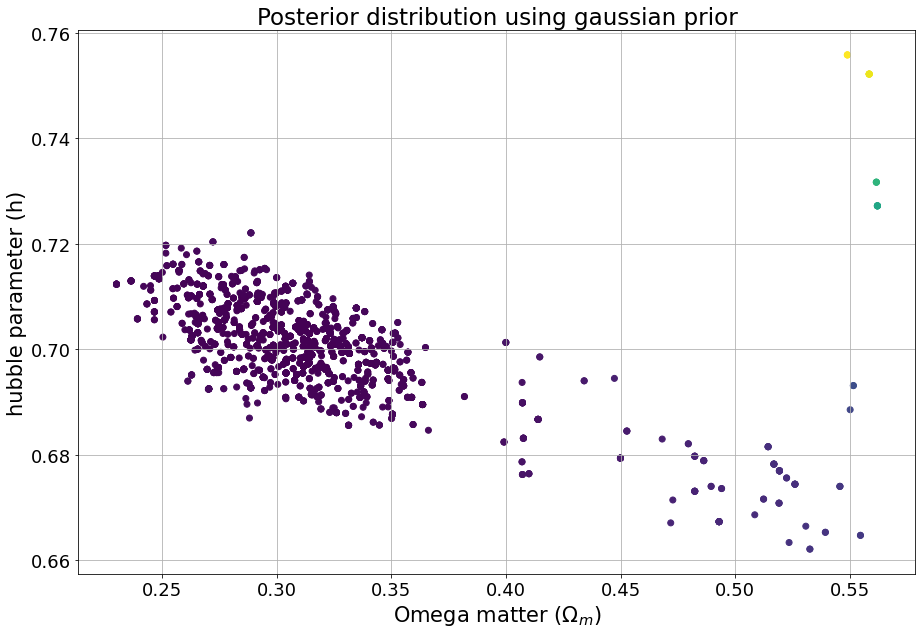

In [13]:
plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 18
plt.scatter(samp_par[:,0], samp_par[:,1], c = -samp_par[:,2], marker='o')
plt.title("Posterior distribution using gaussian prior", fontsize='23')
plt.xlabel("Omega matter ($\Omega_m$)", fontsize='21')
plt.ylabel("hubble parameter (h)", fontsize='21')
plt.grid(True)
plt.show()

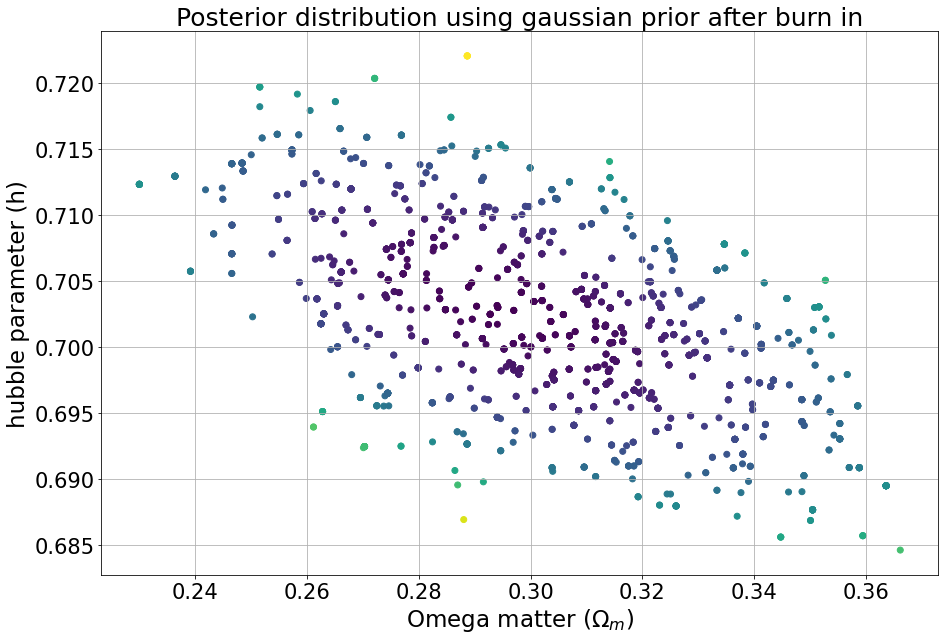

In [14]:
plt.figure(figsize = (15,10))
plt.rcParams['font.size'] = 21
plt.scatter(samp_par[reject:,0], samp_par[reject:,1], c = -samp_par[reject:,2], marker='o')
plt.title("Posterior distribution using gaussian prior after burn in", fontsize='25')
plt.xlabel("Omega matter ($\Omega_m$)", fontsize='23')
plt.ylabel("hubble parameter (h)", fontsize='23')
plt.grid(True)
plt.show()

In [15]:
mean_Omega_P = np.mean(samp_par[reject:,0])          # Mean value of omega matter
var_Omega_P = np.var(samp_par[reject:,0])            # Varience of omega matter
mean_h_P = np.mean(samp_par[reject:,1])              # Mean value of h 
var_h_P = np.var(samp_par[reject:,1])                # Varience of h

print("Estimated mean value of Omega matter with gaussian prior is =", mean_Omega_P)
print("Estimated variance of Omega matter with gaussian prior is =", var_Omega_P)
print("Estimated mean value of hubble parameter (h) with gaussian prior is =", mean_h_P)
print("Estimated variance of hubble parameter (h) with gaussian prior is =", var_h_P)

Estimated mean value of Omega matter with gaussian prior is = 0.3031269164739056
Estimated variance of Omega matter with gaussian prior is = 0.0008230960984617748
Estimated mean value of hubble parameter (h) with gaussian prior is = 0.7020781234328679
Estimated variance of hubble parameter (h) with gaussian prior is = 4.733102626920363e-05


## Posterior distribution of individual parameters

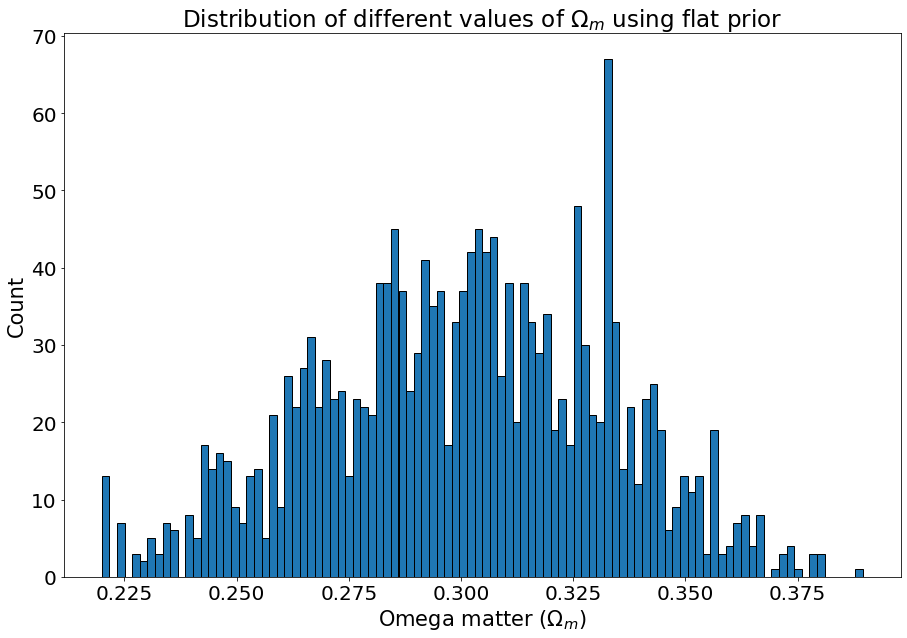

In [16]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.hist(est_par_L[reject:,0], edgecolor='black', bins=100)
plt.title('Distribution of different values of $\Omega_m$ using flat prior', fontsize='23')
plt.xlabel('Omega matter ($\Omega_m$)', fontsize='21')
plt.ylabel('Count', fontsize='21')
plt.show()

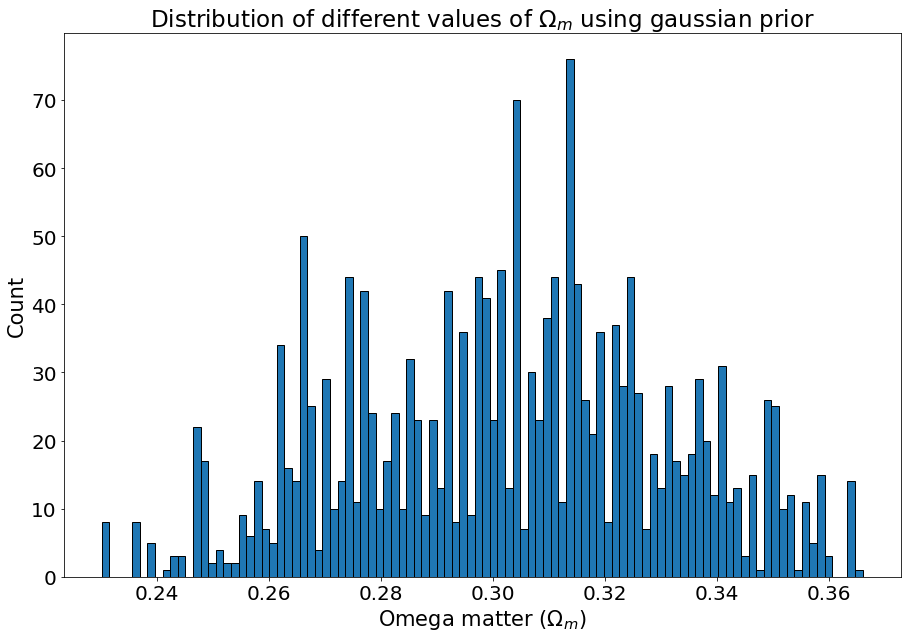

In [17]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.hist(samp_par[reject:,0], edgecolor='black', bins=100)
plt.title('Distribution of different values of $\Omega_m$ using gaussian prior', fontsize='23')
plt.xlabel('Omega matter ($\Omega_m$)', fontsize='21')
plt.ylabel('Count', fontsize='21')
plt.show()

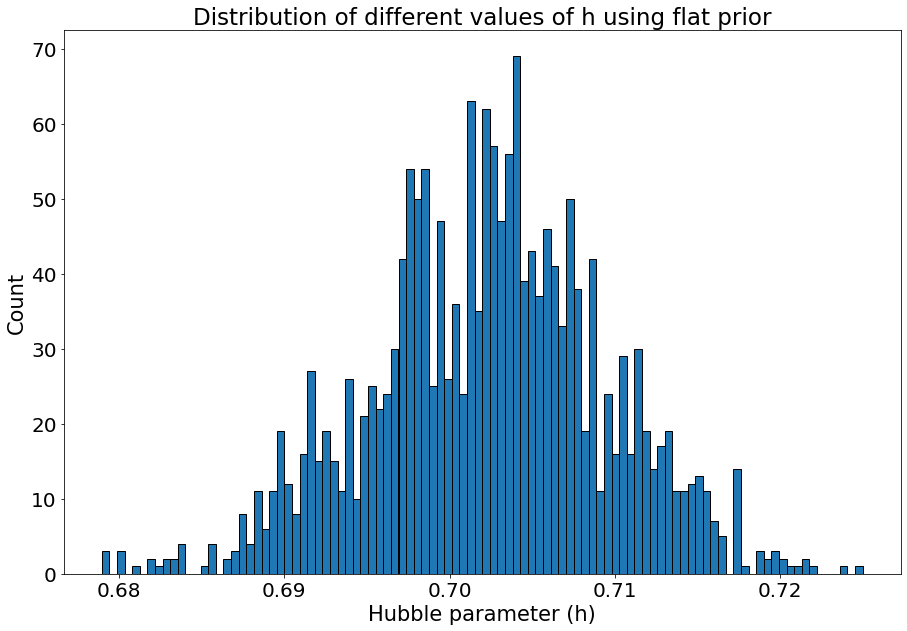

In [18]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.hist(est_par_L[reject:,1], edgecolor='black', bins=100)
plt.title('Distribution of different values of h using flat prior', fontsize='23')
plt.xlabel('Hubble parameter (h)', fontsize='21')
plt.ylabel('Count', fontsize='21')
plt.show()

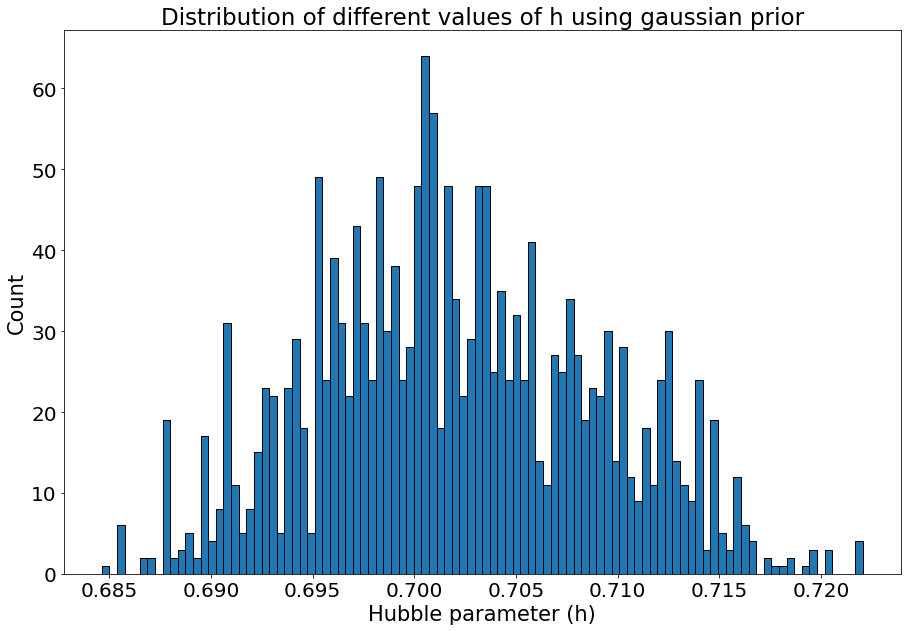

In [19]:
plt.figure(figsize=(15,10))
plt.rcParams['font.size'] = 20
plt.hist(samp_par[reject:,1], edgecolor='black', bins=100)
plt.title('Distribution of different values of h using gaussian prior', fontsize='23')
plt.xlabel('Hubble parameter (h)', fontsize='21')
plt.ylabel('Count', fontsize='21')
plt.show()